# Attrition analysis using IBM HR data

This is a fictional data set created by IBM data scientists. We need to uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

What Is Attrition?
Attrition in business describes a gradual but deliberate reduction in staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation.

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

## Reading and Understanding the Data

In [3]:
df = pd.read_csv('IBM.csv')
print(df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Let's take a look on Attrition features that is our Target

The % distribution of Attrition features is: 
No     84.0
Yes    16.0
Name: Attrition, dtype: float64


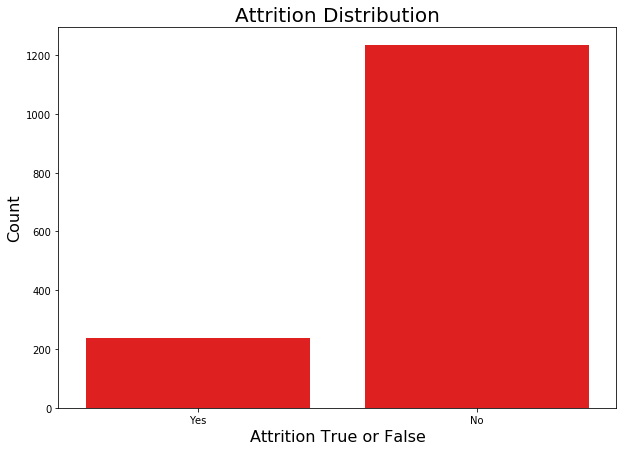

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
# Employee attribution

print("The % distribution of Attrition features is: ")
print(round(df['Attrition'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(df["Attrition"], color='red')
g.set_title("Attrition Distribution", fontsize=20)
g.set_ylabel('Count', fontsize=16)
g.set_xlabel('Attrition True or False', fontsize=16)

plt.show()

df['Attrition'].value_counts()


We can see that 84% of employees did not quit the organization while 16% did leave the organization. We know that we are dealing with an imbalanced dataset. Let's keep exploring the features to see what is the pproximate distribution of Gender.

The % distribution of Gender is: 
Male      60.0
Female    40.0
Name: Gender, dtype: float64


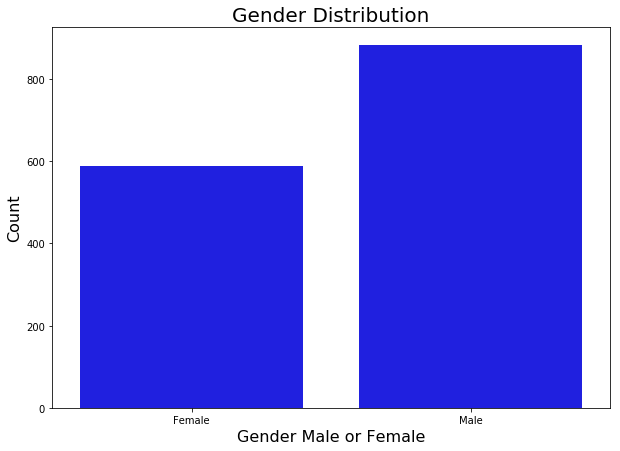

Male      882
Female    588
Name: Gender, dtype: int64

In [12]:
# Gender attribution

print("The % distribution of Gender is: ")
print(round(df['Gender'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(df["Gender"], color='blue')
g.set_title("Gender Distribution", fontsize=20)
g.set_ylabel('Count', fontsize=16)
g.set_xlabel('Gender Male or Female', fontsize=16)

plt.show()

df['Gender'].value_counts()

We can see that 60% of employees are male and 40% are female We know that we are dealing with an imbalanced dataset. Although there are more men than women, the gap between them is not very large.

Ok, now we have a general understanding of this dataset. We can also see that there are many other variables in this dataset.They have two types：numerical variables and categorical variables.For example: the monthly income is a numerical variable and the education is a categorical variable. First, we will pay attention on the numerical variables. 

## What's the distribution of the numerical variables (Age, Monthlyincome and TotalWorkingYears)?

We want to know if various numeric variables obey some distributions. So I plot various distributions based on some of the numerical variables.

C:\Users\mzz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mzz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mzz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


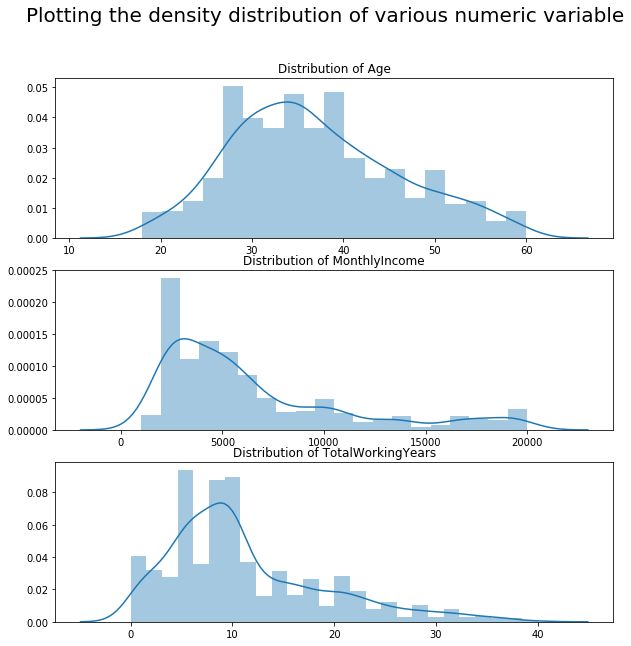

In [14]:
def draw_subplots(var_Name,tittle_Name,nrow=1,ncol=1,idx=1,fz=10): # Define a common module for drawing subplots.
    ax = plt.subplot(nrow,ncol,idx)                   #  idx - position of subplot in the main plotting window
    ax.set_title('Distribution of '+var_Name)         #  fz - the font size of Tittle in the main plotting window
    plt.suptitle(tittle_Name, fontsize=fz)

numeric_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears']

fig,ax = plt.subplots(1,1, figsize=(10,10))
j=0  # reset the counter to plot 
title_Str="Plotting the density distribution of various numeric variable"

for i in numeric_columns:
    j +=1
    draw_subplots(i,title_Str,3,1,j,20) # create a 1x3 subplots for plotting distribution plots
    sns.distplot(df[i])
    plt.xlabel('')

We can get some observations from Density plots. First, the employee's age is normally distributed and mainly distributed between 20 and 50, Anhd the mean of age is around 35.Secondly,the employee's monthly income is not normally distributed. Most of people is earning less than 7500 monthly and the distibution is sckewed to the left. Thirdly, the employee's total working years is also not normally distributed. Work years of the people is mainly distributed between 0 and 15 in a company. After that, it is quickly reduced and the distibution is sckewed to the left.

We continue to explore what numerical variables may cause attrition.

## What factors have led employees to leave the ognization?

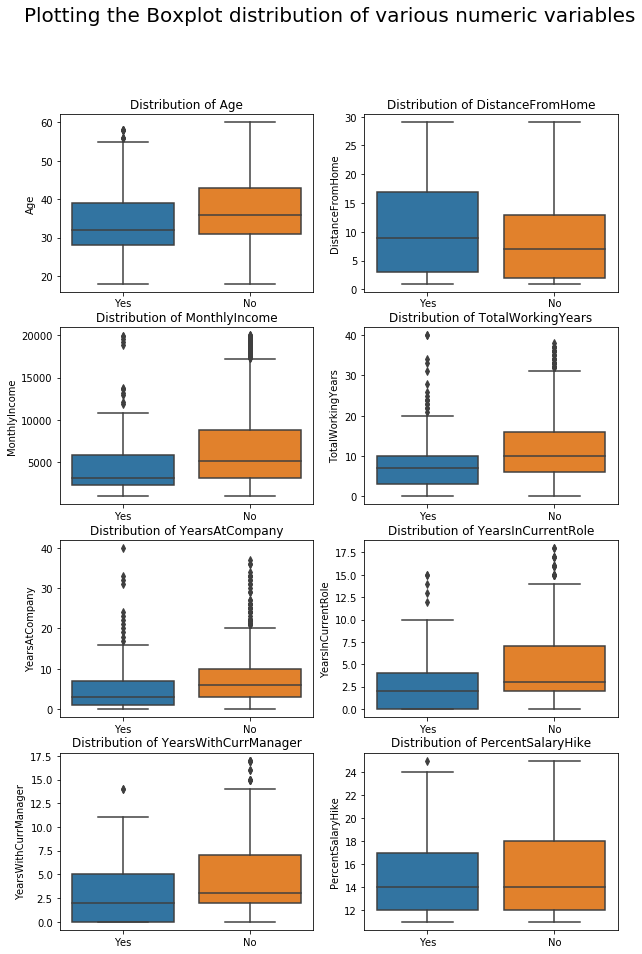

In [16]:
numeric_columns = ['Age', 'DistanceFromHome','MonthlyIncome', 'TotalWorkingYears',
                   'YearsAtCompany', 'YearsInCurrentRole',
                   'YearsWithCurrManager', 'PercentSalaryHike']

fig,ax = plt.subplots(1,1, figsize=(10,15))
j=0 # reset the counter to plot 
title_Str="Plotting the Boxplot distribution of various numeric variables"

for i in numeric_columns:
    j +=1
    draw_subplots(i,title_Str,4,2,j,20) # create a 4x2 subplots for plotting distribution plots
    sns.boxplot(df.Attrition, df[i])  # Note the change in bottom level
    plt.xlabel('')

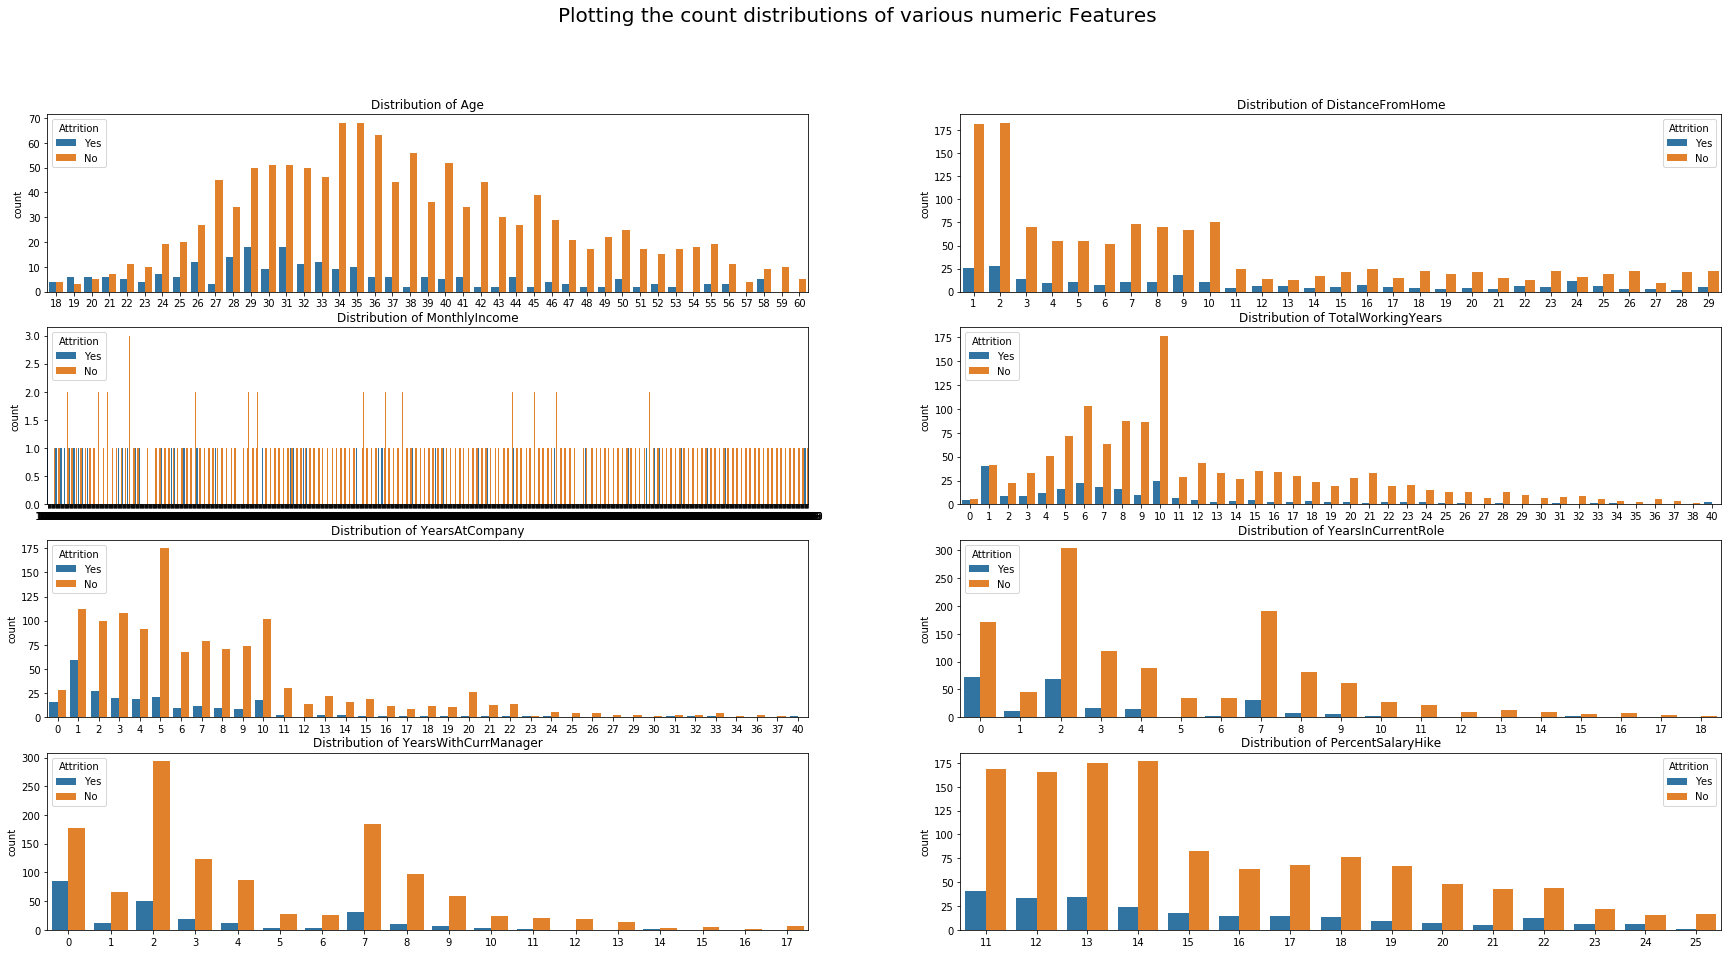

In [17]:
numeric_columns = ['Age', 'DistanceFromHome','MonthlyIncome', 'TotalWorkingYears',
                   'YearsAtCompany', 'YearsInCurrentRole',
                   'YearsWithCurrManager', 'PercentSalaryHike']


fig,ax = plt.subplots(1,1, figsize=(30,15))

j=0 # reset the counter to plot 
title_Str="Plotting the count distributions of various numeric Features"

for i in numeric_columns:
    j +=1
    draw_subplots(i,title_Str,4,2,j,20) # create a 3x2 subplots for plotting distribution plots
    sns.countplot(df[i],hue=df["Attrition"])
    plt.xlabel('')

We plotting the boxplot and histograms for eight numeric variables and we can get some conclusions:

1. The age distribution shows attrition is higher for age between 30 and 40.
2. The DistanceFromHome distribution shows attrition is higher for the distance between 1 and 10.
3. Low Monthly income people are more attrited.
4. Attrition is higher for Less work experience people. The work experience include TotalWorkingYears, YearsAtCompany, YearsInCurrentRole and YearsWithCurrManager.


## Let's see some categorical factors

Attrition,No,Yes
Education,,
1,0.82,0.18
2,0.84,0.16
3,0.83,0.17
4,0.85,0.15
5,0.9,0.1
All,0.84,0.16


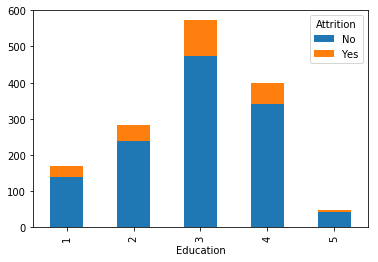

In [61]:
df.groupby('Education')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(df.Education, df.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

From above table, employees with the education 1 which is below college education have the largest attrition proportion(0.18) and are more likely to leave the organisation.

Attrition,No,Yes
MaritalStatus,,
Divorced,0.9,0.1
Married,0.88,0.12
Single,0.74,0.26
All,0.84,0.16


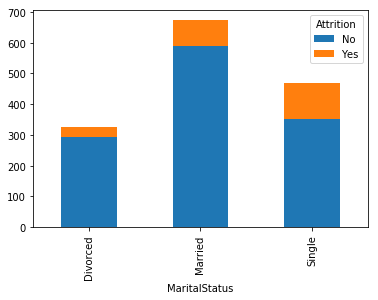

In [62]:
df.groupby('MaritalStatus')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(df.MaritalStatus, df.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

From above table, singles have the largest attrition proportion(0.26) and are more likely to leave the organisation.

Attrition,No,Yes
EducationField,,
Human Resources,0.74,0.26
Life Sciences,0.85,0.15
Marketing,0.78,0.22
Medical,0.86,0.14
Other,0.87,0.13
Technical Degree,0.76,0.24
All,0.84,0.16


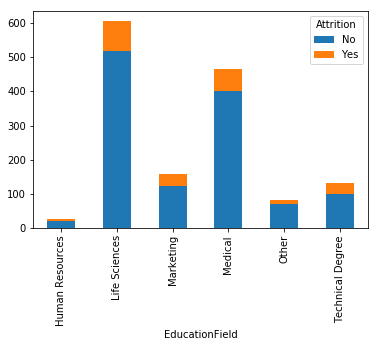

In [84]:
df.groupby('EducationField')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(df.EducationField, df.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

From above table, employees with with Human Resources & Technical Degree have the largest attrition proportion(0.26) and are more likely to leave the organisation.

Attrition,No,Yes
Department,,
Human Resources,0.81,0.19
Research & Development,0.86,0.14
Sales,0.79,0.21
All,0.84,0.16


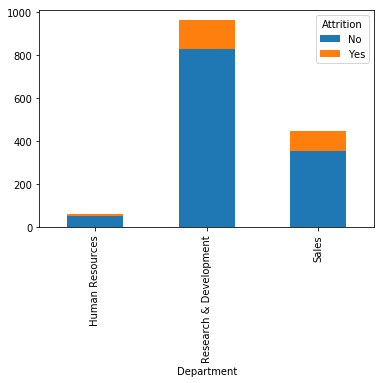

In [85]:
df.groupby('Department')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(df.Department, df.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

From above table, employees from Sales Department have the largest attrition proportion(0.21) and are more likely to leave the organisation.

Attrition,No,Yes
StockOptionLevel,,
0,0.76,0.24
1,0.91,0.09
2,0.92,0.08
3,0.82,0.18
All,0.84,0.16


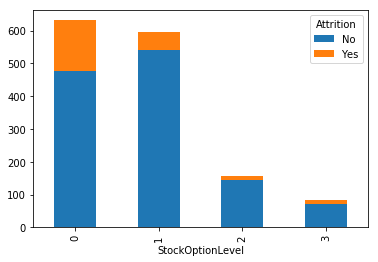

In [88]:
df.groupby('StockOptionLevel')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(df.StockOptionLevel, df.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

From above table, employees with 0 Stock option level have the largest attrition proportion(0.24) and are more likely to leave the organisation.

Attrition,No,Yes
WorkLifeBalance,,
1,0.69,0.31
2,0.83,0.17
3,0.86,0.14
4,0.82,0.18
All,0.84,0.16


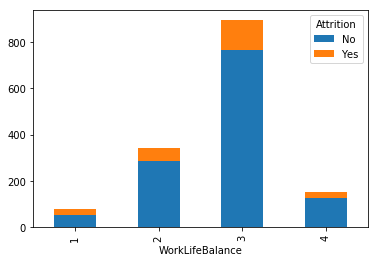

In [89]:
df.groupby('WorkLifeBalance')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(df.WorkLifeBalance, df.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

From above table, employees with Bad Work Life Balance  have the largest attrition proportion(0.31) and are more likely to leave the organisation.

## What is the next?

Now we already know what factors will affect the attrition rate. What are we going to do next?

I think the next step is to study datasets by different groups. For example, we can classify data sets by age and analyze each age group. Because for different ages, the factors that cause them to leave the organisation may be different. Or we can classify the data set by education and analyze each group. I think the advantage of doing this is that we can more accurately grasp the reasons for employees departure for different groups of people and can predict which of the company's employees will be more likely to leave the company in the future. And this will also help the company to recruit more reliable employees in the future.